# K-Means Clustering

El algorítmo K-Means es un método de cuantificación de vectores, muy utilizado en el procesamiento de señales y machine learning, que tiene como objetivo dividir n observaciones en k grupos en los que cada observación pertenece al grupo con la media más cercana (centros de grupo o centroide de grupo) el cual sirve como un prototipo del cluster.

El algorítmo consiste en definir como entrada el vector de datos y el número K de grupos en los cuales se busca dividir el conjunto de datos. Luego se disponen los centroides en posiciones aleatorias. Y luego se repiten los siguientes pasos hasta lograr la convergencia: 
- Para cada punto Xi:
    - Hallar el centroide más cercano
    - Asignar ese punto al cluster j correspondiente (el cluster correspondiente al centroide más cercano hallado en el paso anterior).
- Para cada cluster recalcular la posicion del centroide (calculando la media de los valores de todos los puntos que se encuentran dentro del cluster)

El proceso continúa hasta que no se observan cambios en los clusters.

De esta manera el orden de la operación termina siendo:

O(#iteraciones*#clusters*#instancias*#dimensiones)

Podemos ver entonces que el algorítmo es computacionalmente complejo.

A continuación importamos las librerías a utilizar

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math 

In [2]:
# read the image
image = cv2.imread("../assets/k-means_image.png")

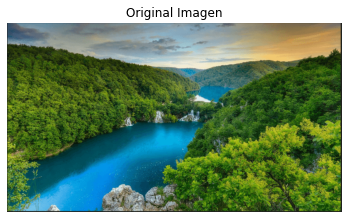

In [3]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")
plt.title("Original Imagen")
plt.show()

In [4]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

Se imprime a continuación el tamaño del arreglo que se utiliza

In [5]:
print(pixel_values.shape)

(336592, 3)


Como se explicó, el algoritmo se detiene cuando ninguna de las asignaciones del clúster cambia. Nosotros, vamos a hacer un poco de trampa, ya que se trata de una gran cantidad de puntos de datos, por lo que llevará mucho tiempo procesarlo. De esta manera nos detendremos cuando se exceda un número de iteraciones (digamos 100) o si los clústeres se mueven menos que algún valor épsilon, el siguiente código define los criterios de detención en OpenCV: 

In [6]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [7]:
# number of clusters (K)
k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [8]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [9]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

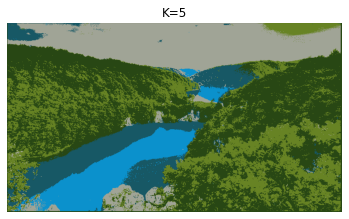

In [10]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.axis("off")
plt.title("K=" + str(k))
plt.show()

Se puede ver que el algorítmo funciona correctamente debido a que podemos ver en la imágen resultante cómo los colores se agrupan entre sí.

A continuación se ordena un poco el código anterior con la finalidad de funcionalizarlo para poder automatizar el cambio de k y mostrar cómo varía la imágen final en base a este parámetro.

In [11]:
def segmented_image_creator(k):
    # define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    # number of clusters (K)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

In [12]:
def plot_diferent_k_values_version(ks):
    fig, axes = plt.subplots(nrows=math.ceil(len(ks)/3), ncols=3, figsize=(14, 10))

    for i, ax in enumerate(axes.flat, start=1):
        if i <= len(ks):
            if ks[i-1] != "original":
                ax.set_title("k="+str(ks[i-1]))
                ax.axis('off')
                ax.imshow(segmented_image_creator(ks[i-1]))
            else:
                ax.set_title("Original Image")
                ax.axis('off')
                ax.imshow(image)
        else:
            ax.axis('off')

    fig.tight_layout()
    plt.title("Same image with diferent number of k groups")
    plt.show()

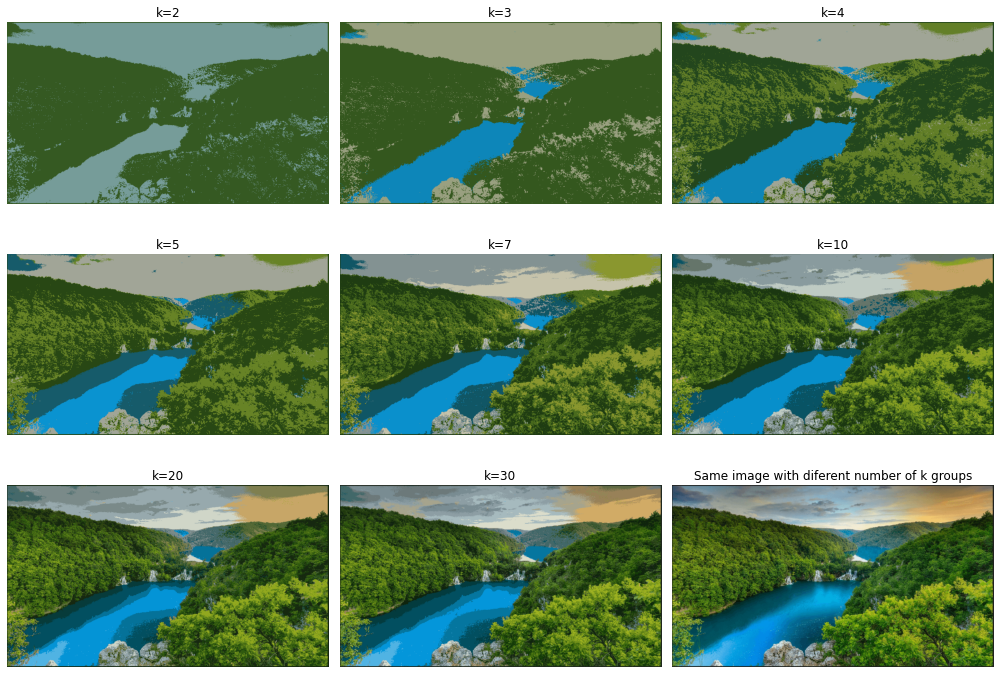

In [13]:
plot_diferent_k_values_version([2,3,4,5,7,10,20,30,"original"])

## Conclusiones

Se puede ver en la imágen anterior que el método K-means es muy util para segmentar los sectores de una imágen que presentan colores similares entre ellos. Esto puede ser muy util por ejemplo si se realiza con la finalidad de entrenar a una red neuronal o para reducir el tamaño de archivo de una imágen en base a disminuir la gama de colores sin con esto perder demasiada definición en la misma.